# Getting Started with Images

In questo notebook vedremo come processare le immagini in python e come visualizzarle tramite la libreria matplotlib

NB codice compatibile con python 3.6 o superiore

In [1]:
# import delle librerie
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = 'data'

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

In [2]:
# loading an image as numpy array

pil_image = Image.open(myResourcePath('google_android.jpg'))

In [3]:
type(pil_image)

PIL.JpegImagePlugin.JpegImageFile

## Visualizzazione di un'immagine
Possiamo visualizzare l'immagine appena caricata con il metodo *imshow* di matplotlib

Dalla documentazione sappiamo che il primo parametro richiede:

    array-like or PIL image
    The image data. Supported array shapes are:

    (M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.
    (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
    (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.
    The first two dimensions (M, N) define the rows and columns of the image.

Quindi dobbiamo convertire l'immagine in un oggetto array-like. 

Tra le molte opzioni consideriamo un numpy array oppure un tensore pytorch


In [4]:
# as tensor

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

tensor_image = pil2tensor(pil_image)

# as numpy array
pil2array = np.array(pil_image)

In [5]:
print(f'type of tensor_image is {type(tensor_image)} and toString: {tensor_image}')
print(f'type of pil2array is {type(pil2array)} and toString: {pil2array}')

type of tensor_image is <class 'torch.Tensor'> and toString: tensor([[[0.2549, 0.2510, 0.2510,  ..., 0.3569, 0.2863, 0.4902],
         [0.2549, 0.2549, 0.2510,  ..., 0.2667, 0.3843, 0.4902],
         [0.2549, 0.2549, 0.2549,  ..., 0.3725, 0.6902, 0.5059],
         ...,
         [0.3451, 0.3412, 0.3490,  ..., 0.1765, 0.1961, 0.1804],
         [0.3529, 0.3725, 0.3843,  ..., 0.1882, 0.2039, 0.1843],
         [0.3608, 0.3882, 0.4157,  ..., 0.1843, 0.2078, 0.1882]],

        [[0.4118, 0.4078, 0.4078,  ..., 0.3882, 0.2980, 0.4902],
         [0.4118, 0.4118, 0.4078,  ..., 0.2784, 0.3922, 0.4824],
         [0.4118, 0.4118, 0.4118,  ..., 0.3686, 0.6824, 0.4980],
         ...,
         [0.4510, 0.4431, 0.4431,  ..., 0.2353, 0.2431, 0.2275],
         [0.4431, 0.4549, 0.4627,  ..., 0.2392, 0.2549, 0.2275],
         [0.4392, 0.4627, 0.4745,  ..., 0.2353, 0.2510, 0.2353]],

        [[0.5529, 0.5490, 0.5490,  ..., 0.2039, 0.1843, 0.4588],
         [0.5529, 0.5529, 0.5490,  ..., 0.1647, 0.2353, 0.4314

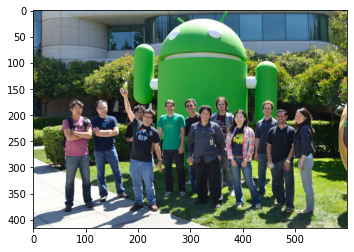

In [6]:
# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

plot_image(tensor_image)

In [7]:
print(f'tensor shape {tensor_image.shape}')
print(f'np.array shape {pil2array.shape}')

tensor shape torch.Size([3, 416, 600])
np.array shape (416, 600, 3)


## Shape del tensore vs shape del numpy array
Per visualizzare con il metodo *imshow* l'array in input deve avere una shape **(H, W, rgb)**.

L'array numpy *pil2array* ha una shape già compatibile, invece il tensore deve essere trasformato.

L'istruzione seguente è un esempio di una trasformazione

    tensore (rgb, H, W) -> numpy array (rgb, H, W) -> numpy array (H, W, rgb) 

In [8]:
tensor_image.numpy().transpose(1, 2, 0).shape

(416, 600, 3)

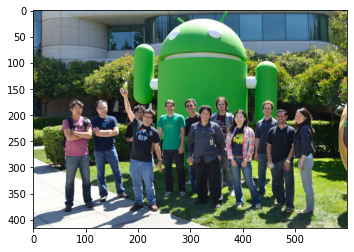

In [9]:
# plot with numpy array

plt.figure()
# imshow needs a numpy array with the channel dimension
# as the the last dimension so we have to transpose things.
plt.imshow(pil2array)
plt.show()

# Dataset di immagini

Nella CV è molto più frequente avere un dataset di immagini, quindi esitono dei metodo che facilitano il caricamento e la costruzione del dataset. Nel package torchvision è presente la classe ImageFolder che restituisce un oggetto che rappresenta il dataset

    torchvision.datasets.ImageFolder(root, transform=None, target_transform=None, loader=<function default_loader>, is_valid_file=None)

        A generic data loader where the images are arranged in this way:

        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/xxz.png

        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/asd932_.png

Iterando sul dataset, ogni elemento è rappresentato dalla tupla

    (sample, target) where target is class_index of the target class.

Nell'esempio le classi sono *dog* e *cat*

> 

In [10]:
IMAGE_DATASET = myResourcePath('nature')

for i, fname in enumerate(sorted(os.listdir(IMAGE_DATASET))):
    print(f'{i + 1}. {fname}')

1. image1.jpg
2. image2.jpg
3. image3.jpg
4. image4.jpg


In [11]:
import torchvision.datasets as dataset_util

dataset = dataset_util.ImageFolder(myResourcePath('.'), transform=transforms.ToTensor())

In [12]:
for i, (item, c_index) in enumerate(dataset):
    print(f'{i} -> {item.shape}')

0 -> torch.Size([3, 266, 400])
1 -> torch.Size([3, 267, 400])
2 -> torch.Size([3, 267, 400])
3 -> torch.Size([3, 281, 400])


0 -> torch.Size([3, 266, 400])


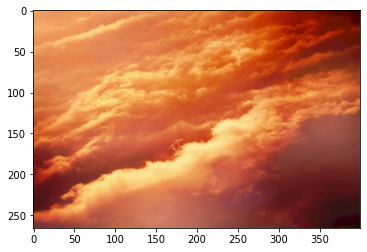

1 -> torch.Size([3, 267, 400])


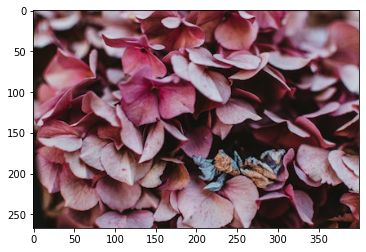

2 -> torch.Size([3, 267, 400])


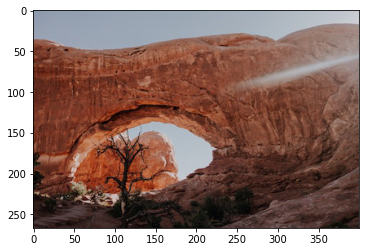

3 -> torch.Size([3, 281, 400])


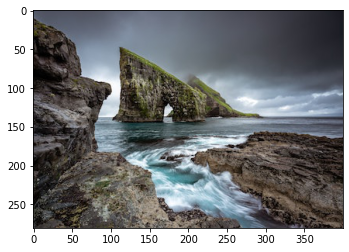

In [13]:
for i, (item, c_index) in enumerate(dataset):
    print(f'{i} -> {item.shape}')
    plot_image(item)

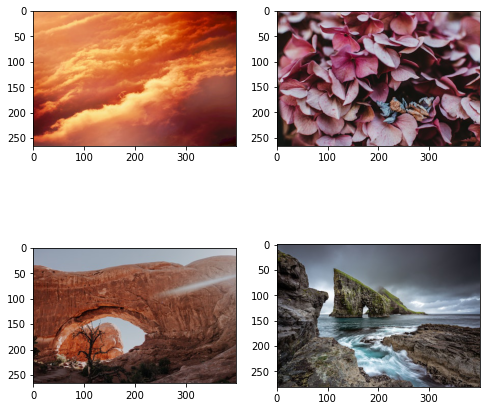

In [14]:
# visualizzazione con un subplot 2 x 2

image_list = [item for item, c_index in dataset] # len() == 4

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = image_list[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.numpy().transpose(1, 2, 0))
plt.show()